It is decision of "Titanik" from Kaggle: "https://www.kaggle.com/competitions/titanic".

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from functions_for_titanik import inpute_data, encode_categorical, make_prediction_file

In [2]:
#Path to data

PATH_TO_TRAIN = "kaggle_data/train.csv"
PATH_TO_TEST = "kaggle_data/test.csv"

In [3]:
#Loading data

train = pd.read_csv(PATH_TO_TRAIN, index_col="PassengerId") # Training sample
test = pd.read_csv(PATH_TO_TEST, index_col="PassengerId")   # Test sample

In [4]:
#Checking the data status #1
print("train:")
train.info()
print(" \ntest:")
test.info()

train:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
 
test:
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       33

In [5]:
#Drop useless columns

useless_columns = ["Name", "Ticket", "Cabin"] #There is very little data in the "Cabin"

train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

In [6]:
#Inputing NaN data

train_full = inpute_data(train_clean)
test_full = inpute_data(test_clean)

In [7]:
#Checking the data status #2
print("train_full:")
train_full.info()
print(" \ntest_full:")
test_full.info()

train_full:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB
 
test_full:
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Emba

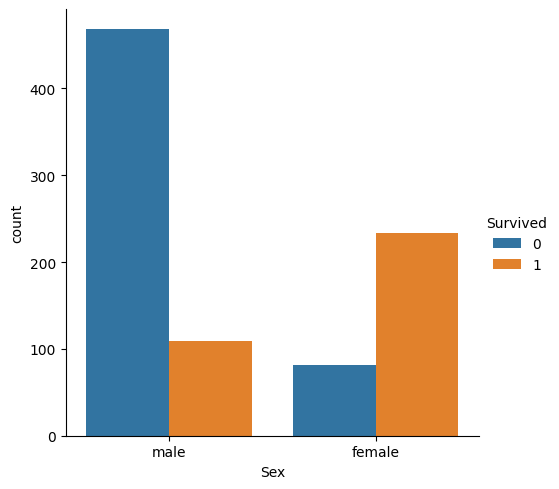

In [8]:
#Data visualization

sns.catplot(data=train_full, x="Sex", hue="Survived", kind="count") #Men die more often

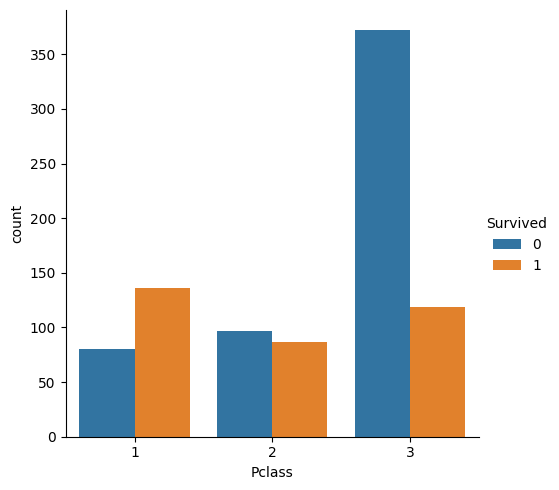

In [9]:
sns.catplot(data=train_full, x="Pclass", hue="Survived", kind="count") #The poor also die more often

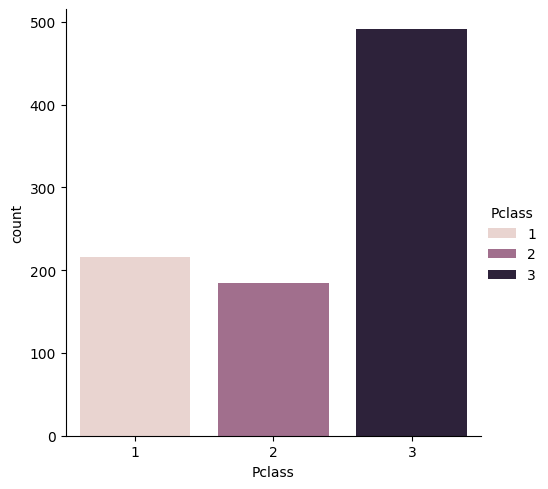

In [10]:
sns.catplot(data=train_full, x="Pclass", hue="Pclass", kind="count") #At the same time, the poor were the most

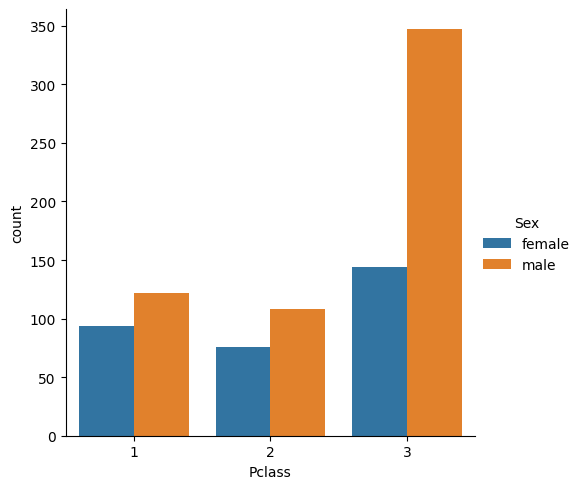

In [11]:
sns.catplot(data=train_full, x="Pclass", hue="Sex", kind="count")  #The poor man were the most

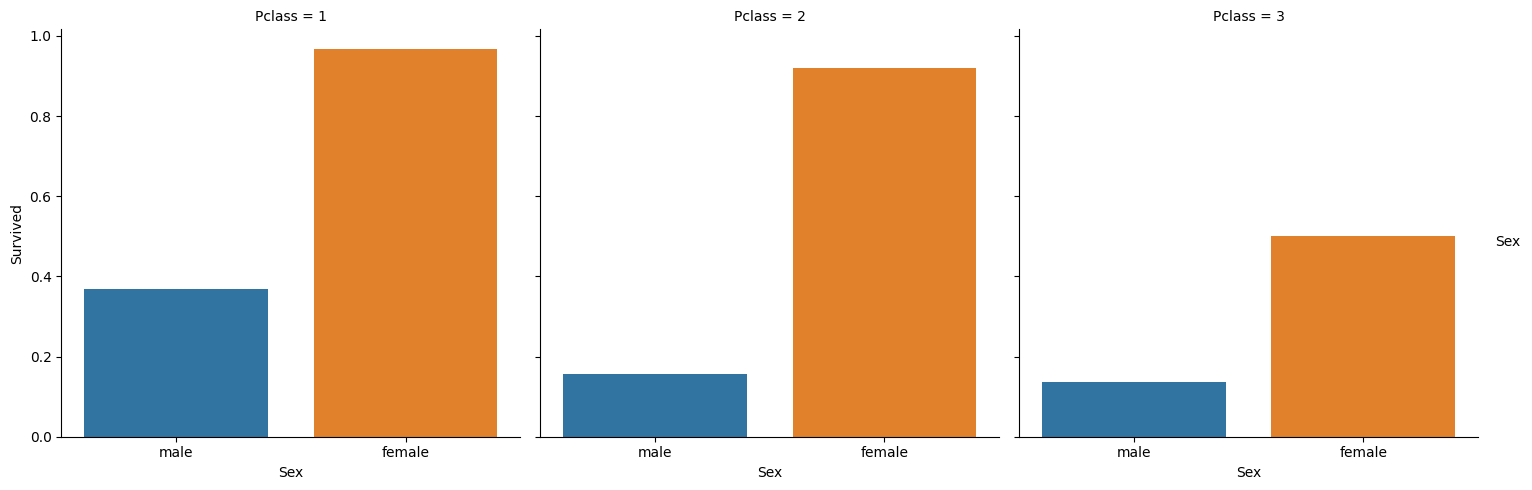

In [12]:
sns.catplot(data=train_full, x="Sex", y="Survived", hue="Sex", col="Pclass", kind="bar", errorbar=None)  #And the dead among them were the most

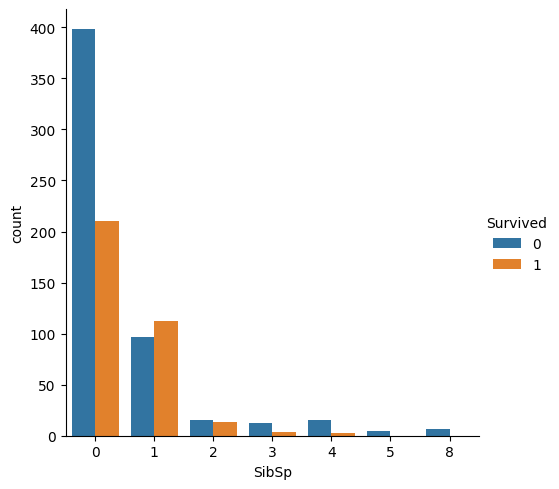

In [13]:
# Survival also depends on the number of families

sns.catplot(data=train_full, x="SibSp", hue="Survived", kind="count") # Here they are siblings/spouses

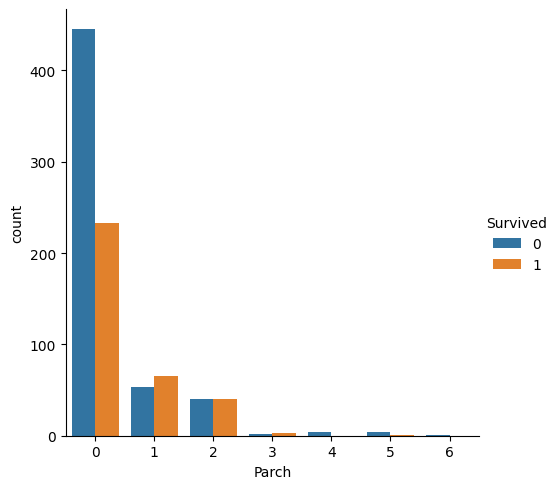

In [14]:
sns.catplot(data=train_full, x="Parch", hue="Survived", kind="count") # Here it's parents/children

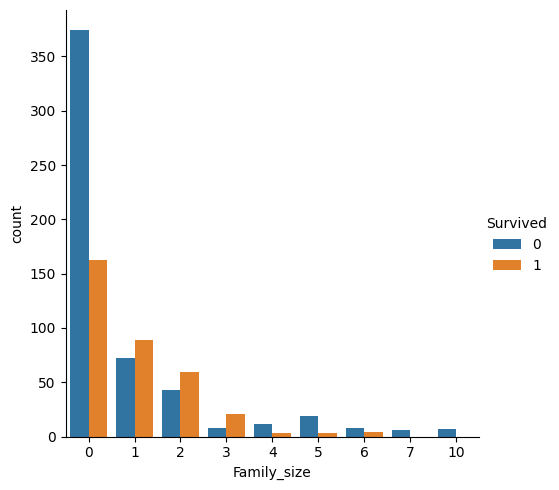

In [15]:
# Feature Engineering "SibSp" and "Parch"

train_full["Family_size"] = train_full["SibSp"] + train_full["Parch"]
test_full["Family_size"] = test_full["SibSp"] + test_full["Parch"]

sns.catplot(data=train_full, x="Family_size", hue="Survived", kind="count")

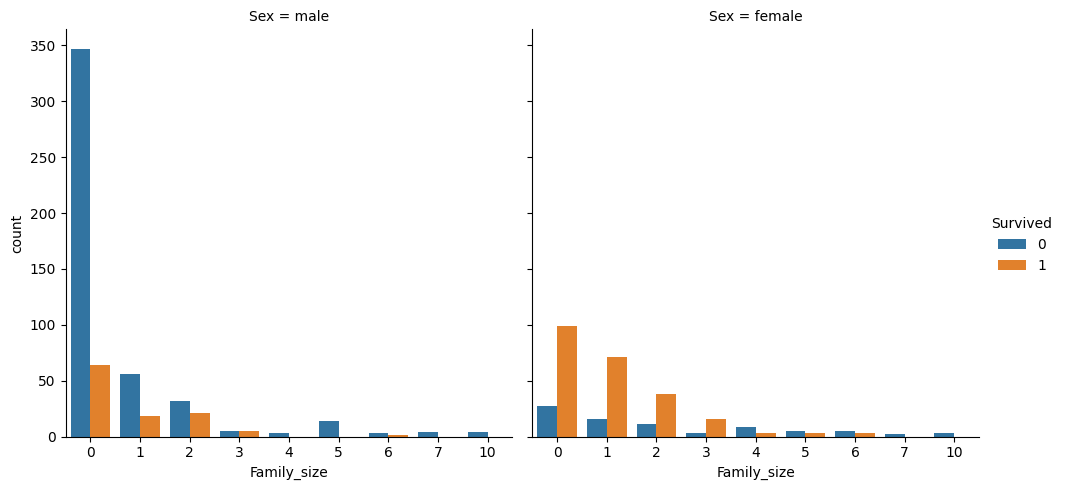

In [16]:
sns.catplot(data=train_full, x="Family_size", hue="Survived", col="Sex", kind="count") # Family_size doesn't affect the survival of men

In [17]:
#We separate the target variable from the training sample so as not to confuse the algorithm

y_train = train_full["Survived"]
train_sep = train_full.drop(columns="Survived")

In [18]:
#One-hot-encoding categorical data

X_train, X_test = encode_categorical(train_sep, test_full)

In [19]:
#Looking at the result
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_size,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,1,True,False,True
2,1,38.0,1,0,71.2833,1,False,False,False
3,3,26.0,0,0,7.9250,0,False,False,True
4,1,35.0,1,0,53.1000,1,False,False,True
5,3,35.0,0,0,8.0500,0,True,False,True
...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,True,False,True
888,1,19.0,0,0,30.0000,0,False,False,True
889,3,28.0,1,2,23.4500,3,False,False,True


In [20]:
#Checking the data status #3
print("X_train:")
X_train.info()
print(" \nX_test:")
X_test.info()

X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Family_size  891 non-null    int64  
 6   Sex_male     891 non-null    bool   
 7   Embarked_Q   891 non-null    bool   
 8   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.3 KB
 
X_test:
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   F

In [21]:
#Save data for 3_metrics

X_train.to_csv("X_sample.csv")
y_train.to_csv("y_sample.csv")
X_test.to_csv("X_test_kaggle.csv")

#DECISIONS

In [22]:
#Decision tree

dt_clf = DecisionTreeClassifier()

In [23]:
%%time

dt_clf.fit(X_train, y_train) #Training

CPU times: total: 0 ns
Wall time: 4 ms


DecisionTreeClassifier()

In [24]:
dt_pred = dt_clf.predict(X_test) # Prediction

In [25]:
#Decision tree + GridSearchCV

clf = DecisionTreeClassifier()

parameters = {"criterion": ["entropy", "gini"],
              "max_depth": range(1, 10), 
              "min_samples_split": range(2, 10),
              "min_samples_leaf": range(1, 10)
              }

grid_cv = GridSearchCV(clf, parameters, cv=5)

In [26]:
%%time

grid_cv.fit(X_train, y_train) #Training

CPU times: total: 18.8 s
Wall time: 20 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [27]:
#Choicing best model
best_model = grid_cv.best_estimator_
print("Best params:", grid_cv.best_params_)

Best params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 6}


In [28]:
grid_pred = best_model.predict(X_test) #Prediction

In [29]:
#Quick Desicion Tree

random_grid_cv = RandomizedSearchCV(clf, parameters, cv = 5)

In [30]:
%%time

random_grid_cv.fit(X_train, y_train) #Training

CPU times: total: 125 ms
Wall time: 133 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [31]:
best_model_rand = random_grid_cv.best_estimator_
print("Best params:", random_grid_cv.best_params_)

Best params: {'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'entropy'}


In [32]:
rand_grid_pred = best_model_rand.predict(X_test) #Prediction

In [33]:
#Best prediction
dt_best = DecisionTreeClassifier(max_depth=4)

In [34]:
dt_best.fit(X_train, y_train) #Training

DecisionTreeClassifier(max_depth=4)

In [35]:
best_pred = dt_best.predict(X_test) #Prediction

In [36]:
#Make prediction files

all_pred_name = ["dt_pred", "grid_pred", "rand_grid_pred", "best_pred"]
all_pred = [dt_pred, grid_pred, rand_grid_pred, best_pred]

for id_pred in range(len(all_pred)):
    make_prediction_file(all_pred[id_pred], X_test, f"{all_pred_name[id_pred]}.csv")